# Practice: Train, Validate --> Train, Test
In this lab you will revisit the cross-validation process to evaluate and then fully train a 
classification model on the scikit learn **digits** dataset using the `GaussianNB` classifier.

## Required resources and imports

In [6]:
# note: you will need a few other things here - come back and import them later
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits # do not change this!
from sklearn.naive_bayes import GaussianNB # use the GaussianNB model
from collections import OrderedDict # the code using this module is given to you
from sklearn.model_selection import cross_val_score,train_test_split

In [2]:
help(load_digits)

Help on function load_digits in module sklearn.datasets.base:

load_digits(n_class=10, return_X_y=False)
    Load and return the digits dataset (classification).
    
    Each datapoint is a 8x8 image of a digit.
    
    =================   ==============
    Classes                         10
    Samples per class             ~180
    Samples total                 1797
    Dimensionality                  64
    Features             integers 0-16
    =================   ==============
    
    Read more in the :ref:`User Guide <datasets>`.
    
    Parameters
    ----------
    n_class : integer, between 0 and 10, optional (default=10)
        The number of classes to return.
    
    return_X_y : boolean, default=False.
        If True, returns ``(data, target)`` instead of a Bunch object.
        See below for more information about the `data` and `target` object.
    
        .. versionadded:: 0.18
    
    Returns
    -------
    data : Bunch
        Dictionary-like object, the in

## Model construction

In [18]:
# load dataset (we're working with the digits dataset)
raw = load_digits()

# TODO: split raw into X and Y sets
X = raw.data
y = raw.target

# TODO: perform a validation split, reserving 30% of the data for testing
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)
# we'll use the Gaussian Naive Bayes classifier
classifier = GaussianNB()

## Cross-validation

In [19]:
# TODO: perform 10-fold *automated* cross-validation on the data
scores = cross_val_score(classifier,X_train,y_train,cv=10)
print(scores) # this should print out a 10-item array

[ 0.83969466  0.85271318  0.85826772  0.83464567  0.84126984  0.84126984
  0.88095238  0.8699187   0.85123967  0.80991736]


## Fully train the model

In [20]:
# TODO: re-fit a model to the data
fitted = classifier.fit(X_train,y_train)

## Test final model performance

In [21]:
# GaussianNB.predict() returns class labels (integers)
predict = fitted.predict(X_test)

# check for unique labels
indices = set()
for l in predict:
    indices.add(l)
    l -= 2
print(indices)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


The data is in 10 groups, so indices are all from 0 to 9. We should select ten colors for plotting.

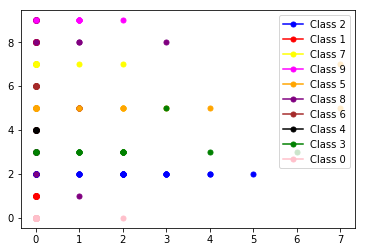

In [24]:
# select colors to match to indices 0-9
colors = ["red", "blue", "green", "black","orange","brown","yellow","purple","magenta","pink"] #fill in the remaining six
used = []

# iterate over labels and assign color to each point
for i in np.arange(0, len(X_test)):
    col = colors[predict[i]-1]
    used += col
    if col not in used:
        plt.plot(X_test[:,1][i], y_test[i], color=col, marker='o', 
                 markersize=5, label="Class %i" % predict[i])

# cut out duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')
plt.show()

## Save model to disk via pickling

In [25]:
# TODO: pickle model to disk 
# (this will require an import - use either of the modules discussed in lab)
from sklearn.externals import joblib
joblib.dump(classifier,'GaussianDigits.pkl')

['GaussianDigits.pkl']

## Load and re-test model

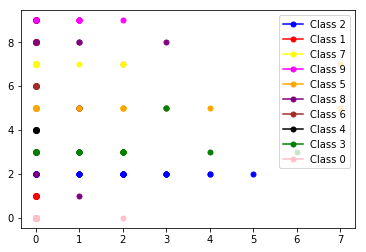

In [28]:
# TODO: load/unpickle model
loaded_model = joblib.load('GaussianDigits.pkl')
# select colors to match to indices 0-9 (can copy from above, this is boilerplate anyway)
colors = ["red", "blue", "green", "black","orange","brown","yellow","purple","magenta","pink"]

used = []

# iterate over labels and assign color to each point
for i in np.arange(0, len(X_test)):
    col = colors[predict[i]-1]
    used += col
    if col not in used:
        plt.plot(X_test[:,1][i], y_test[i], color=col, marker='o', 
                 markersize=5, label="Class %i" % predict[i])

# cut out duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper right')
plt.show()

# Save your notebook